In [2]:

## 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [23]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe8

In [8]:
df=pd.read_csv('C:\\Users\\pc\Desktop\\climate forecasting\\jena_climate_2009_2016.csv')
df.head(12)



,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [9]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [10]:
## we will take every 6 rows (this mean will study the effect after every 1 hour  starting from row 5
df=df[5::6]
df.head(10)
df.to_csv('TS data.csv', index=False)


In [11]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')


<Axes: xlabel='Date Time'>

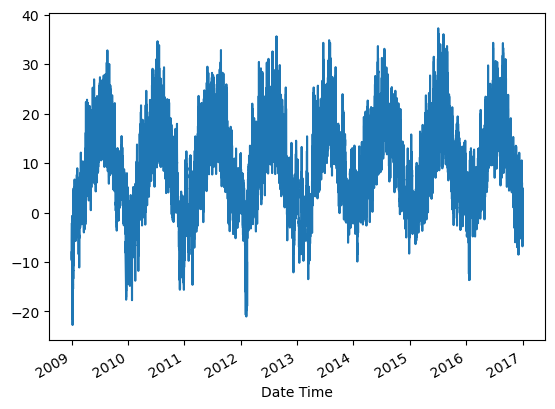

In [12]:
### making a variable called temp to study and forecast this variable will be our focus 
temp = df['T (degC)']
temp.plot()

In [13]:
## making a matrix of inputs followed by our oytput( the forecasted values)  it will be going as follow 
## our input will be (1,2,3,4,5) and will be used to get our the hour # 6 ## and do it continuously
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [14]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [15]:
### split the data into train and test our samples for test and validation and train are random
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [16]:
### compiling the model 
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
##  computing the best model to represent our data 
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [18]:
### fitting the data
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10

1867/1875 [============================>.] - ETA: 0s - loss: 32.4695 - root_mean_squared_error: 5.6982INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 17s 6ms/step - loss: 32.3421 - root_mean_squared_error: 5.6870 - val_loss: 1.3934 - val_root_mean_squared_error: 1.1804
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.2815 - root_mean_squared_error: 1.5105INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 2.2821 - root_mean_squared_error: 1.5107 - val_loss: 0.7173 - val_root_mean_squared_error: 0.8469
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.0321 - root_mean_squared_error: 1.0159INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 1.0322 - root_mean_squared_error: 1.0160 - val_loss: 0.5627 - val_root_mean_squared_error: 0.7501
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.7674 - root_mean_squared_error: 0.8760INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7676 - root_mean_squared_error: 0.8761 - val_loss: 0.5512 - val_root_mean_squared_error: 0.7424
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6972 - root_mean_squared_error: 0.8350INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6975 - root_mean_squared_error: 0.8351 - val_loss: 0.5272 - val_root_mean_squared_error: 0.7261
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6708 - root_mean_squared_error: 0.8190INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6701 - root_mean_squared_error: 0.8186 - val_loss: 0.5107 - val_root_mean_squared_error: 0.7146
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8101INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6571 - root_mean_squared_error: 0.8106 - val_loss: 0.5090 - val_root_mean_squared_error: 0.7134
Epoch 8/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6521 - root_mean_squared_error: 0.8075INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6517 - root_mean_squared_error: 0.8073 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6477 - root_mean_squared_error: 0.8048 - val_loss: 0.5117 - val_root_mean_squared_error: 0.7153
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6445 - root_mean_squared_error: 0.8028 - val_loss: 0.5147 - val_root_mean_squared_error: 0.7174


In [19]:
## load the model into the meomery
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [14]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
0,-9.877172,-9.67
1,-9.672713,-9.17
2,-8.759667,-8.10
3,-7.266286,-7.66
4,-7.143009,-7.04
...,...,...
59995,6.039471,6.07
59996,7.280533,9.88
59997,12.186380,13.53
59998,15.897847,15.43


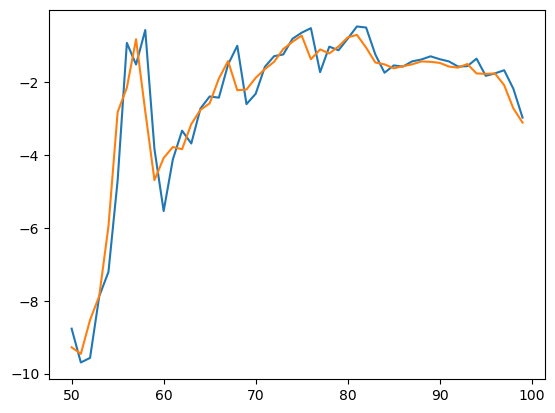

In [15]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [16]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.449401,14.02
1,13.325230,13.67
2,13.178016,12.27
3,11.624513,11.19
4,10.510709,10.85
...,...,...
4995,17.492462,18.27
4996,17.499252,17.85
4997,17.346498,16.65
4998,16.000547,15.85


y_val1


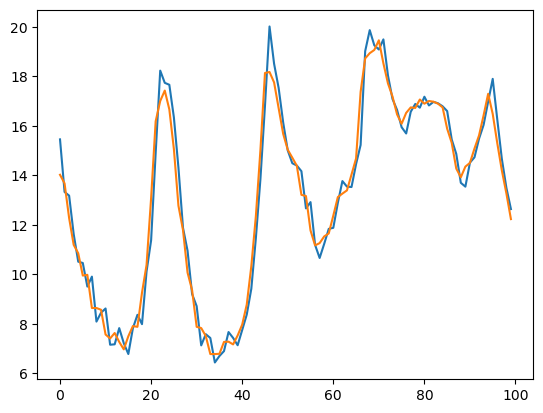

In [17]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [18]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.542806,13.99
1,13.366555,13.46
2,12.985162,12.93
3,12.577212,12.43
4,12.124272,12.17
...,...,...
5081,-1.124559,-0.98
5082,-1.638639,-1.40
5083,-1.826701,-2.75
5084,-3.303043,-2.89


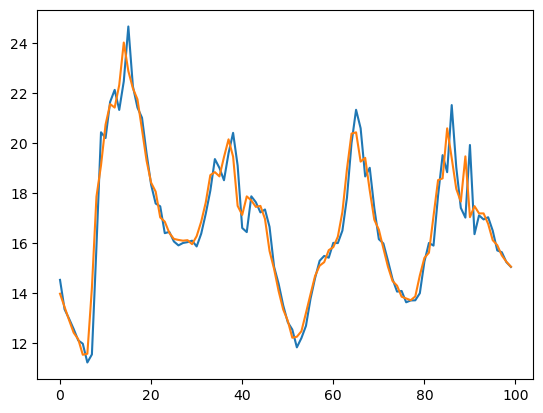

In [19]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])